In [19]:
# check whether we can avoid negative concentration through D_cross or others

In [20]:
import pybamm as pybamm;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os; #import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'


In [21]:
font = {'family' : 'Times New Roman',
        #'weight' : 'bold',
        'size'   : 18}
mpl.rc('font', **font)

In [22]:
V_max = 4.2;        V_min = 2.5;
Diff_SEI = 1.7e-20;    R_SEI = 2E5;   Bulk_Sol_Con = 4541.0;
Experiment_Long   = pybamm.Experiment( [ (
    f"Discharge at 1 C until {V_min} V", )    ] * 1 )  
Model_ddiff = pybamm.lithium_ion.DFN(     
    options={"solvent diffusion": "EC w refill"} )

using EC w refill for Li+


Model_sdiff.variables.search('Electrolyte current density')

In [23]:
ChemistryChen=pybamm.parameter_sets.Chen2020 
ChemistryChen["electrolyte"] = "lipf6_Nyman2008_rio";
Para_0=pybamm.ParameterValues(chemistry=ChemistryChen);
Para_0['EC Lithium ion cross diffusivity [m2.s-1]'] = 1.5e-9/1e2;
Para_0['Typical EC Lithium ion cross diffusivity [m2.s-1]'] =   1.5e-9/1e2
Para_0['EC transference number'] =    -1.4
Para_0['EC diffusivity in electrolyte [m2.s-1]'] =  5E-12;
Para_0['Electrolyte diffusivity [m2.s-1]'] =   3E-10;
Para_0.update({'Cation transference number':0.3})

Para_0.search("diffusivity")
gamma_e_ec_Rio = Para_0.evaluate(Model_ddiff.param.gamma_e_ec_Rio)  
print(gamma_e_ec_Rio)

In [24]:
# Scan for Cation transference number
Para_0.update({'EC transference number':-1.0})
Sim_minus_1_ddiff    = pybamm.Simulation(
    Model_ddiff, experiment = Experiment_Long,
    parameter_values = Para_0,
    solver = pybamm.CasadiSolver(),)   
Sol_minus_1_ddiff    = Sim_minus_1_ddiff.solve();
Para_0.update({'EC transference number':-1.4})
Sim_minus_1p4_ddiff    = pybamm.Simulation(
    Model_ddiff, experiment = Experiment_Long,
    parameter_values = Para_0,
    solver = pybamm.CasadiSolver(),)   
Sol_minus_1p4_ddiff    = Sim_minus_1p4_ddiff.solve();
Para_0.update({'EC transference number':-1.8})
Sim_minus_1p8_ddiff    = pybamm.Simulation(
    Model_ddiff, experiment = Experiment_Long,
    parameter_values = Para_0,
    solver = pybamm.CasadiSolver(),)   
Sol_minus_1p8_ddiff    = Sim_minus_1p8_ddiff.solve();

In [25]:
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P3R4/'; 
Target  = 'a1_Para_Study/'
if not os.path.exists(BasicPath + Target):
    os.mkdir(BasicPath + Target);

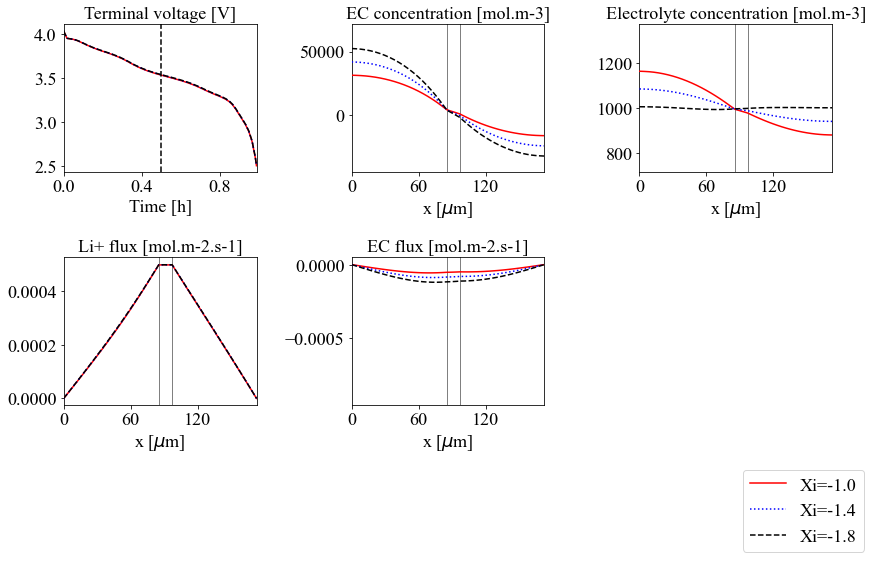

In [32]:
label = ["Xi=-1.0","Xi=-1.4","Xi=-1.8"] 
output_variables3 = [
    "Terminal voltage [V]",   
    #"Current [A]",
    "EC concentration [mol.m-3]",
    "Electrolyte concentration [mol.m-3]",
    #"Loss of capacity to SEI [A.h]",
    "Li+ flux [mol.m-2.s-1]",
    "EC flux [mol.m-2.s-1]",
    #"Porosity times EC concentration",
    #"Porosity times concentration",
]
quick_plot = pybamm.QuickPlot([
    Sol_minus_1_ddiff,Sol_minus_1p4_ddiff,Sol_minus_1p8_ddiff
    ], output_variables3,label,
    variable_limits='fixed',time_unit='hours',n_rows=2,
    figsize = (12,8)) #     spatial_unit='mm',
#quick_plot.dynamic_plot();
quick_plot.plot(0.5)
quick_plot.fig.savefig(BasicPath + Target+"Xi_three_cases.png", dpi=600)

In [33]:
label = ["Xi=-1.0","Xi=-1.4","Xi=-1.8"] 
output_variables3 = [
    "Terminal voltage [V]",   
    "EC flux by diffusion [mol.m-2.s-1]",  
    "EC flux by migration [mol.m-2.s-1]",
    "EC flux by Li+ [mol.m-2.s-1]"
]
quick_plot = pybamm.QuickPlot([
    Sol_minus_1_ddiff,Sol_minus_1p4_ddiff,Sol_minus_1p8_ddiff
    ], output_variables3,label,
    variable_limits='fixed',time_unit='hours',n_rows=2,
    figsize = (12,8)) #     spatial_unit='mm',
quick_plot.dynamic_plot();
#quick_plot.plot(0.5)
#quick_plot.fig.savefig(BasicPath + Target+"Xi_three_cases.png", dpi=600)

interactive(children=(FloatSlider(value=0.0, description='t', max=0.9893844575167074, step=0.00989384457516707…

In [34]:
label = ["Xi=-1.0","Xi=-1.4","Xi=-1.8"] 
output_variables3 = [
    "Terminal voltage [V]",   
    "Li+ flux by diffusion [mol.m-2.s-1]",  
    "Li+ flux by migration [mol.m-2.s-1]",
    "Li+ flux by solvent [mol.m-2.s-1]"
]
quick_plot = pybamm.QuickPlot([
    Sol_minus_1_ddiff,Sol_minus_1p4_ddiff,Sol_minus_1p8_ddiff
    ], output_variables3,label,
    variable_limits='fixed',time_unit='hours',n_rows=2,
    figsize = (12,8)) #     spatial_unit='mm',
quick_plot.dynamic_plot();

interactive(children=(FloatSlider(value=0.0, description='t', max=0.9893844575167074, step=0.00989384457516707…

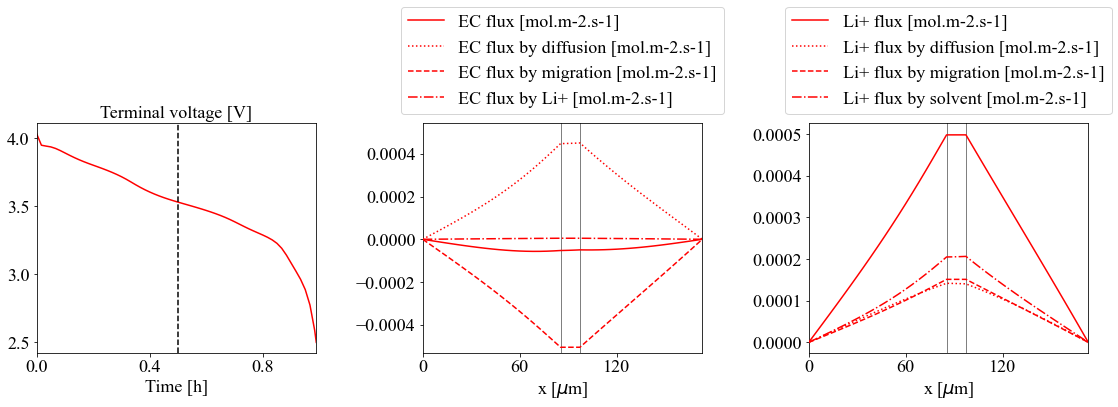

In [27]:
label = ["Xi=-1.0"] 
output_variables3 = [
    "Terminal voltage [V]",   
    ["EC flux [mol.m-2.s-1]","EC flux by diffusion [mol.m-2.s-1]",
        "EC flux by migration [mol.m-2.s-1]","EC flux by Li+ [mol.m-2.s-1]"],
    ["Li+ flux [mol.m-2.s-1]","Li+ flux by diffusion [mol.m-2.s-1]",
        "Li+ flux by migration [mol.m-2.s-1]","Li+ flux by solvent [mol.m-2.s-1]"],    
]
quick_plot = pybamm.QuickPlot([
    Sol_minus_1_ddiff,
    ], output_variables3,label,
    variable_limits='fixed',time_unit='hours',n_rows=1,
    figsize = (16,6)) #     spatial_unit='mm',
#quick_plot.dynamic_plot();
quick_plot.plot(0.5)
quick_plot.fig.savefig(BasicPath + Target+"Xi=-1.0_flux_component.png", dpi=600)

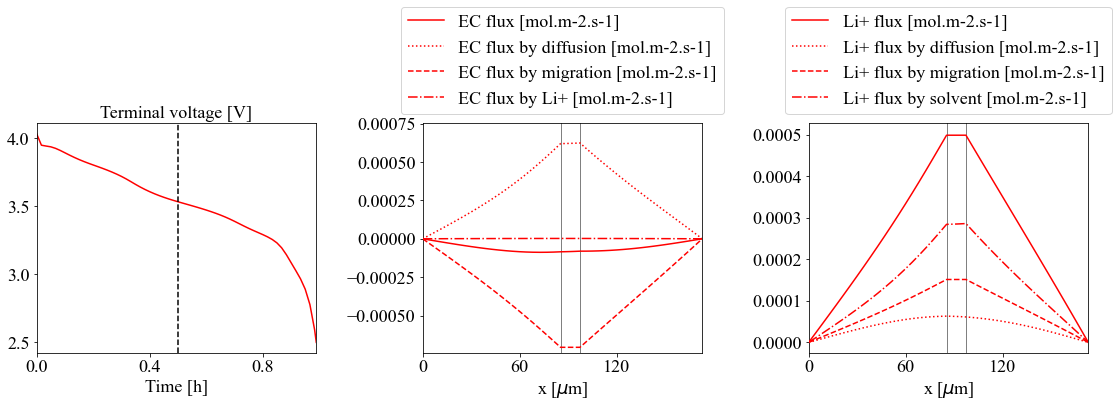

In [28]:
label = ["Xi=-1.4"] 
output_variables3 = [
    "Terminal voltage [V]",   
    ["EC flux [mol.m-2.s-1]","EC flux by diffusion [mol.m-2.s-1]",
        "EC flux by migration [mol.m-2.s-1]","EC flux by Li+ [mol.m-2.s-1]"],
    ["Li+ flux [mol.m-2.s-1]","Li+ flux by diffusion [mol.m-2.s-1]",
        "Li+ flux by migration [mol.m-2.s-1]","Li+ flux by solvent [mol.m-2.s-1]"],      
]
quick_plot = pybamm.QuickPlot([
    Sol_minus_1p4_ddiff,
    ], output_variables3,label,
    variable_limits='fixed',time_unit='hours',n_rows=1,
    figsize = (16,6)) #     spatial_unit='mm',
#quick_plot.dynamic_plot();
quick_plot.plot(0.5)
quick_plot.fig.savefig(BasicPath + Target+"Xi=-1.4_flux_component.png", dpi=600)

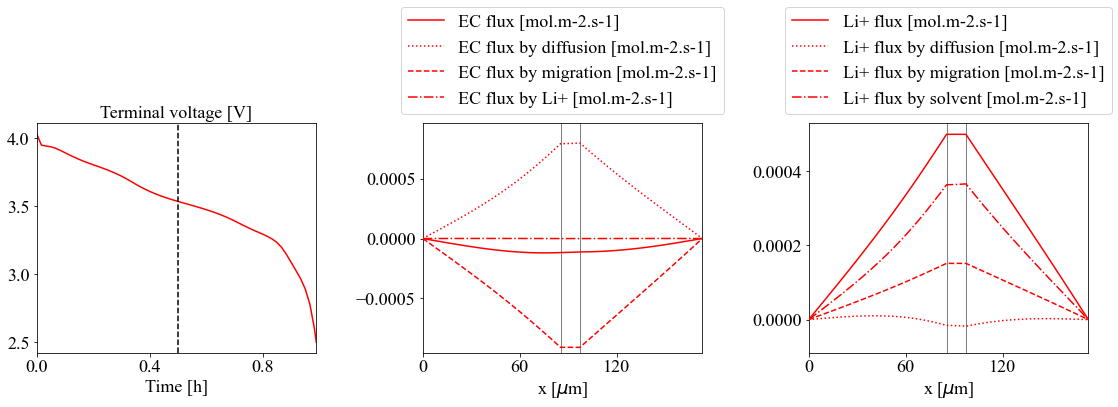

In [29]:
label = ["Xi=-1.8"] 
output_variables3 = [
    "Terminal voltage [V]",   
    ["EC flux [mol.m-2.s-1]","EC flux by diffusion [mol.m-2.s-1]",
        "EC flux by migration [mol.m-2.s-1]","EC flux by Li+ [mol.m-2.s-1]"],
    ["Li+ flux [mol.m-2.s-1]","Li+ flux by diffusion [mol.m-2.s-1]",
        "Li+ flux by migration [mol.m-2.s-1]","Li+ flux by solvent [mol.m-2.s-1]"],      
]
quick_plot = pybamm.QuickPlot([
    Sol_minus_1p8_ddiff,
    ], output_variables3,label,
    variable_limits='fixed',time_unit='hours',n_rows=1,
    figsize = (16,6)) #     spatial_unit='mm',
#quick_plot.dynamic_plot();
quick_plot.plot(0.5)
quick_plot.fig.savefig(BasicPath + Target+"Xi=-1.8_flux_component.png", dpi=600)